# 1. Darknet Clone

Runtime => GPU

In [111]:
# clone darkenet repo
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [112]:
!ls -al darknet

-rwxr-xr-x 1 root root 5567288 May 26 14:31 darknet


In [113]:
%cd darknet

[Errno 20] Not a directory: 'darknet'
/content/darknet


In [114]:
!ls -al

total 873584
drwxr-xr-x 16 root root      4096 May 26 14:53  .
drwxr-xr-x  1 root root      4096 May 26 12:03  ..
drwxr-xr-x  4 root root      4096 May 26 12:03  3rdparty
drwxr-xr-x  2 root root      4096 May 26 12:03  backup
drwxr-xr-x  3 root root      4096 May 26 12:03  build
-rwxr-xr-x  1 root root     32896 May 26 12:03  build.ps1
-rw-r--r--  1 root root  17349341 May 26 14:53 'cabc30fc-e7726578 (1).mp4'
-rw-r--r--  1 root root  17349341 May 26 12:07  cabc30fc-e7726578.mp4
drwxr-xr-x  3 root root      4096 May 26 12:03  cfg
drwxr-xr-x  2 root root      4096 May 26 12:03  .circleci
drwxr-xr-x  3 root root      4096 May 26 12:03  cmake
-rw-r--r--  1 root root     25373 May 26 12:03  CMakeLists.txt
-rwxr-xr-x  1 root root   5567288 May 26 14:31  darknet
-rw-r--r--  1 root root      1479 May 26 12:03  DarknetConfig.cmake.in
-rw-r--r--  1 root root      9541 May 26 12:03  darknet_images.py
-rw-r--r--  1 root root     10828 May 26 12:03  darknet.py
-rw-r--r--  1 root root      6747 May 

In [115]:
!ls -al data

total 1744
drwxr-xr-x  3 root root   4096 May 26 12:03 .
drwxr-xr-x 16 root root   4096 May 26 14:53 ..
-rw-r--r--  1 root root 140047 May 26 12:03 9k.tree
-rw-r--r--  1 root root    387 May 26 12:03 coco9k.map
-rw-r--r--  1 root root    625 May 26 12:03 coco.names
-rw-r--r--  1 root root 163759 May 26 12:03 dog.jpg
-rw-r--r--  1 root root 141886 May 26 12:03 eagle.jpg
-rw-r--r--  1 root root 382965 May 26 12:03 giraffe.jpg
-rw-r--r--  1 root root     80 May 26 12:03 goal.txt
-rw-r--r--  1 root root 133495 May 26 12:03 horses.jpg
-rw-r--r--  1 root root 218420 May 26 12:03 imagenet.labels.list
-rw-r--r--  1 root root 246356 May 26 12:03 imagenet.shortnames.list
drwxr-xr-x  2 root root  20480 May 26 12:03 labels
-rw-r--r--  1 root root   5476 May 26 12:03 openimages.names
-rw-r--r--  1 root root 113880 May 26 12:03 person.jpg
-rw-r--r--  1 root root 174515 May 26 12:03 scream.jpg
-rw-r--r--  1 root root    135 May 26 12:03 voc.names


In [116]:
!ls -al data/labels

total 3068
drwxr-xr-x 2 root root 20480 May 26 12:03 .
drwxr-xr-x 3 root root  4096 May 26 12:03 ..
-rw-r--r-- 1 root root   320 May 26 12:03 100_0.png
-rw-r--r-- 1 root root   377 May 26 12:03 100_1.png
-rw-r--r-- 1 root root   451 May 26 12:03 100_2.png
-rw-r--r-- 1 root root   508 May 26 12:03 100_3.png
-rw-r--r-- 1 root root   577 May 26 12:03 100_4.png
-rw-r--r-- 1 root root   631 May 26 12:03 100_5.png
-rw-r--r-- 1 root root   697 May 26 12:03 100_6.png
-rw-r--r-- 1 root root   753 May 26 12:03 100_7.png
-rw-r--r-- 1 root root   321 May 26 12:03 101_0.png
-rw-r--r-- 1 root root   388 May 26 12:03 101_1.png
-rw-r--r-- 1 root root   458 May 26 12:03 101_2.png
-rw-r--r-- 1 root root   514 May 26 12:03 101_3.png
-rw-r--r-- 1 root root   581 May 26 12:03 101_4.png
-rw-r--r-- 1 root root   654 May 26 12:03 101_5.png
-rw-r--r-- 1 root root   726 May 26 12:03 101_6.png
-rw-r--r-- 1 root root   804 May 26 12:03 101_7.png
-rw-r--r-- 1 root root   305 May 26 12:03 102_0.png
-rw-r--r-- 1 roo

In [117]:
# change makefile to have GPU,OPENCV, CUDNN enabled
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [118]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [119]:
# Compile Source
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1150:10: note: ...thi

In [120]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2022-05-26 14:57:42--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.3’

yolov3.weights.3    100%[===================>] 236.52M  14.8MB/s    in 12s     

2022-05-26 14:57:55 (20.1 MB/s) - ‘yolov3.weights.3’ saved [248007048/248007048]



In [121]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

In [122]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import IPython

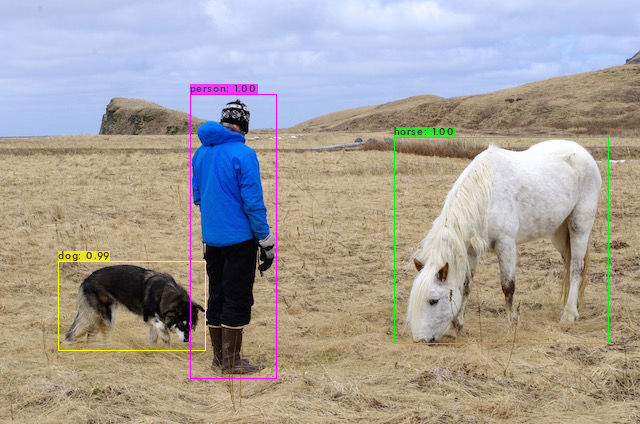

In [123]:
result = cv2.imread('predictions.jpg')
cv2_imshow(result)

# 2. OpenCV YOLO Video

In [124]:
import cv2
import IPython
import numpy as np
import time
import math
from google.colab.patches import cv2_imshow

In [125]:
min_confidence = 0.5 

weight_file = 'yolov3.weights'
cfg_file = 'cfg/yolov3.cfg'
name_file = 'data/coco.names'

file_name = 'cabc30fc-e7726578.mp4'

In [126]:
# Load Model
net = cv2.dnn.readNet(weight_file, cfg_file)

In [127]:
classes = []
with open(name_file, 'r') as f:
    classes = [line.strip() for line in f.readlines()]
print(classes)


['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [128]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

colors = np.random.uniform(0, 255, size=(len(classes), 3))


In [129]:
# cabc30fc-e7726578.mp4
from google.colab import files 
files.upload()

Saving cabc30fc-e7726578.mp4 to cabc30fc-e7726578 (2).mp4


In [130]:
frame_count = 0
writer = None
output_name = 'output_video_car.avi'

In [131]:
def writeFrame(img):
    # use global variable, writer
    global writer
    height, width = img.shape[:2]
    if writer is None and output_name is not None:
        fourcc = cv2.VideoWriter_fourcc(*'MJPG')
        writer = cv2.VideoWriter(output_name, fourcc, 24, (width, height), True)
    if writer is not None:
        writer.write(img)

In [132]:
def detectAndDisplay(frame):
    # use global variable, writer
    global frame_count
    frame_count += 1
    start_time = time.time()
    IPython.display.clear_output(wait=True)
    height, width, channedls = frame.shape
    # Detecting objects
    # https://docs.opencv.org/master/d6/d0f/group__dnn.html
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            # Filter only car (2)
            if (confidence > min_confidence) and (class_id == 2):
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Region of Interest
    mask = np.zeros((height,width), dtype='uint8')
    poly_top = int(0.65 * height)
    poly_bottom = int(0.85 * height)
    poly_left = int(0.47 * width)
    poly_right = int(0.53 * width)
    roi_left = int(0.3 * width)
    roi_right = int(0.6 * width)
    poly_margin = 50
    polygons = np.array([[(0+poly_margin,poly_bottom), (poly_left, poly_top), (poly_right, poly_top), (width-poly_margin, poly_bottom)]])
    cv2.fillPoly(mask, polygons, 255)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
    font = cv2.FONT_HERSHEY_COMPLEX
    margin = 5
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            # Bitwise operation between box and mask 
            box = np.array([[(x-margin, y+h+margin), (x-margin, y-margin), (x+w+margin, y), (x+w+margin, y+h+margin)]])
            cv2.fillPoly(mask, box, 0) 
            # Eliminate Small object(<50) & roi_left~right 까지만 필터
            if (w > 50) and (x > roi_left) and (x < roi_right):
                label = str(classes[class_ids[i]])
                print(class_ids[i], label, w)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(frame, label, (x, y + 30), font, 0.5, (0, 255, 0), 1) 
            # label = str(classes[class_ids[i]])
            # print(class_ids[i], label, w)
            # cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # cv2.putText(frame, label, (x, y + 30), font, 0.5, (0, 255, 0), 1) 
    #cv2_imshow(mask)
    # Lane Detection
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    # GaussianBlur for refucing noise
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 40, 130)

    # Bitwise operation between poly and mask
    masked = cv2.bitwise_and(canny, mask)
    #cv2_imshow(masked)
    # Lane Detection
    lines = cv2.HoughLinesP(masked, 2, np.pi / 180, 20, np.array([]), 20, 10)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(frame, (x1,y1), (x2,y2), (0,  255, 255), 5)

    frame_time = time.time() - start_time 
    print("Frame {} time {}".format(frame_count, frame_time))
    cv2_imshow(frame)   
    writeFrame(frame)

2 car 177
Frame 1203 time 1.8580679893493652


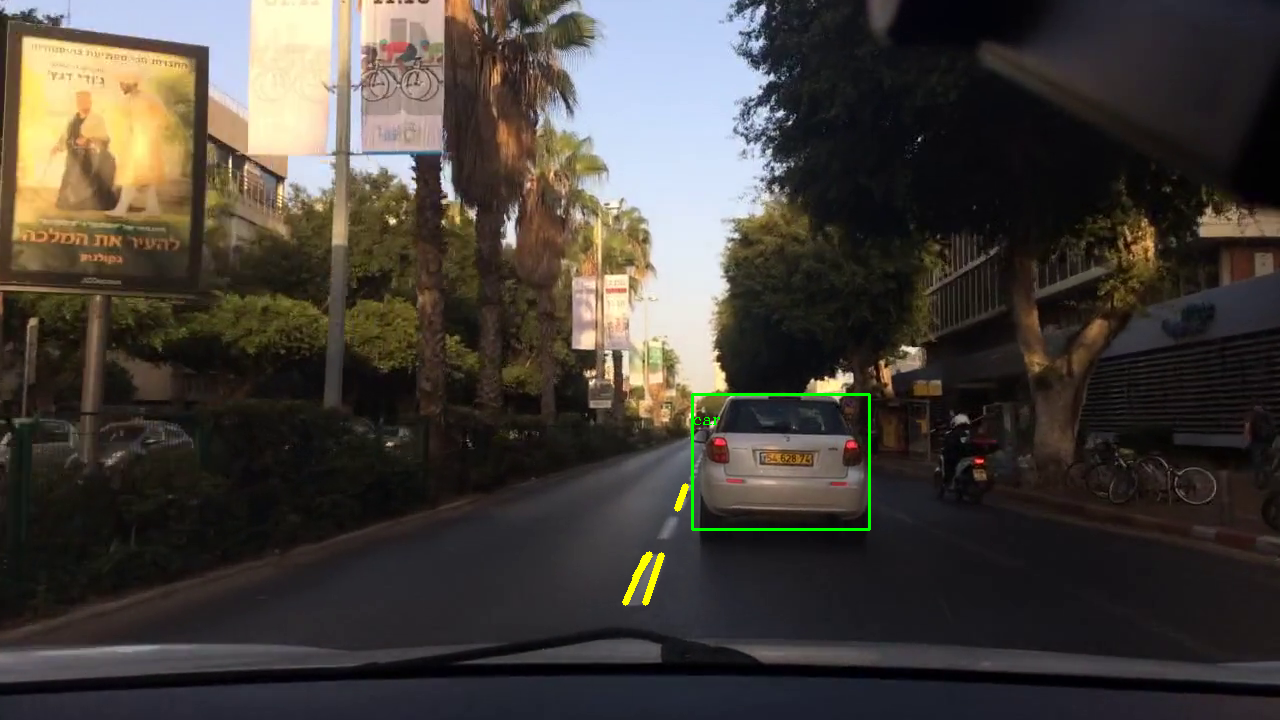

--(!) No captured frame -- Break!


In [133]:
# #-- 2. Read the video stream
frame_count = 0
cap = cv2.VideoCapture(file_name)
if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)
while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break
    detectAndDisplay(frame)

2 car 1357
2 car 88
2 car 49
Frame 50 time 2.077361583709717


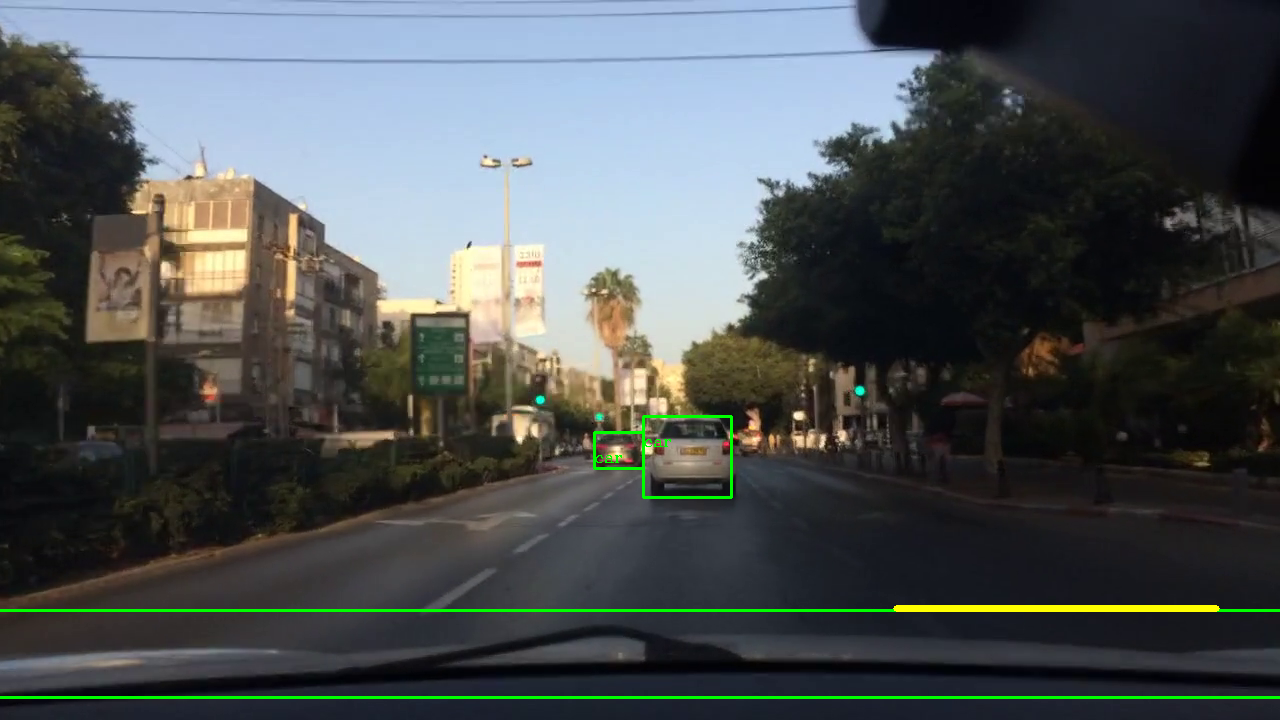

--(!) No captured frame -- Break!


In [ ]:
#-- 2. Read the video stream - Test Frame
# frame_count = 0
# cap = cv2.VideoCapture(file_name)
# if not cap.isOpened:
#     print('--(!)Error opening video capture')
#     exit(0)
# while True:
#     ret, frame = cap.read()
#     if frame is None:
#         print('--(!) No captured frame -- Break!')
#         break
#     if(frame_count <50):
#       detectAndDisplay(frame)

In [134]:
from google.colab import files
files.download(output_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>